In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
import numpy as np
import cv2

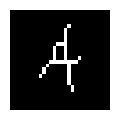

In [ ]:
image_path = 'A-0.png'
image = io.imread(image_path)

if image.ndim == 3:
    image = color.rgb2gray(image)

threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

skeleton = skeletonize(binary_image)

image = transform.resize(image, (28, 28))
skeleton = transform.resize(skeleton, (28, 28))

plt.figure(figsize=(1, 1))

plt.imshow(skeleton, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('skeleton_image.png', format='png', dpi=28)

In [ ]:
import cv2
import numpy as np

path = 'skeleton_image.png'
img = cv2.imread(path, 0)

(rows, cols) = np.nonzero(img)

endpoint_coords = []

for (r, c) in zip(rows, cols):
    top = max(0, r - 1)
    right = min(img.shape[1] - 1, c + 1)
    bottom = min(img.shape[0] - 1, r + 1)
    left = max(0, c - 1)

    sub_img = img[top: bottom + 1, left: right + 1]
    if np.sum(sub_img) == 255*2:
        endpoint_coords.append((r,c))

print(endpoint_coords)

[(4, 16), (13, 19), (18, 8), (22, 17)]


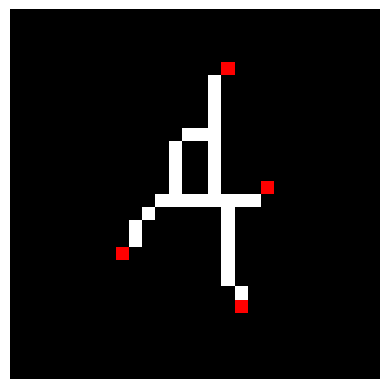

In [ ]:
skeleton_image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)
output_image = cv2.cvtColor(skeleton_image, cv2.COLOR_GRAY2BGR)
for point in endpoint_coords:
    y, x = point
    output_image[y, x] = (0, 0, 255)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Green Points: [(16, 4), (19, 13), (10, 15), (8, 18)]
Blue Points: [(15, 5), (13, 9), (12, 10), (11, 14), (18, 14), (9, 16), (9, 17), (16, 20), (17, 21), (17, 22)]


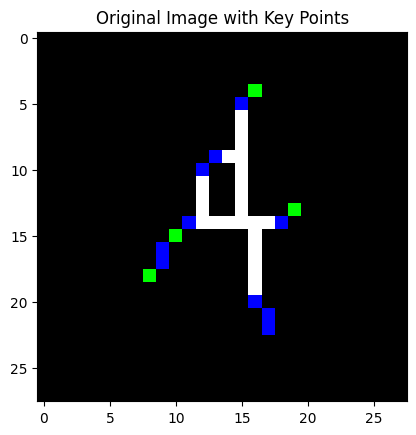

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the black and white image
image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)

# Initialize the green and blue point arrays
green_points = []
blue_points = []

# Iterate through the image to find key points
for y in range(1, image.shape[0] - 1):
    for x in range(1, image.shape[1] - 1):
        if image[y, x] == 255:  # Check if the pixel is white
            surrounding_pixels = [
                image[y - 1, x], image[y + 1, x], image[y, x - 1], image[y, x + 1]
            ]

            # Check for green points (surrounded by 4 black pixels)
            if surrounding_pixels.count(0) == 4:
                green_points.append((x, y))

            # Check for blue points (surrounded by exactly 3 black pixels)
            elif surrounding_pixels.count(0) == 3 and surrounding_pixels.count(255) == 1:
                blue_points.append((x, y))

# Print the green and blue point arrays to the terminal
print("Green Points:", green_points)
print("Blue Points:", blue_points)

# Create a color image with the original image
color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Overlay green and blue points on the color image
for x, y in green_points:
    color_image[y, x] = [0, 255, 0]  # Set the pixel to green
for x, y in blue_points:
    color_image[y, x] = [255, 0, 0]  # Set the pixel to blue

# Display the color image with key points and text
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Key Points')
plt.show()

# Save the green and blue images
green_image = np.zeros_like(image)
blue_image = np.zeros_like(image)

for x, y in green_points:
    green_image[y, x] = 255

for x, y in blue_points:
    blue_image[y, x] = 255

cv2.imwrite('green_points.png', green_image)
cv2.imwrite('blue_points.png', blue_image)


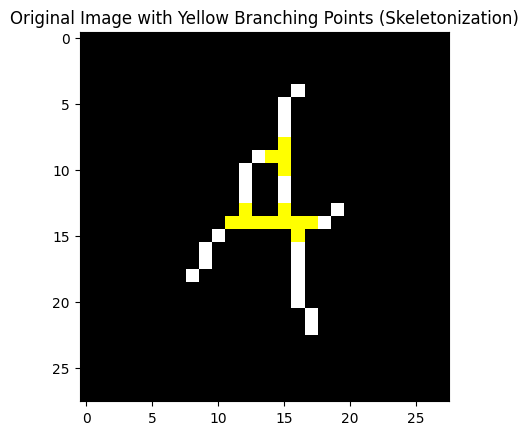

Yellow Branching Points (Skeletonization): [(15, 8), (14, 9), (15, 9), (15, 10), (12, 13), (15, 13), (11, 14), (12, 14), (13, 14), (14, 14), (15, 14), (16, 14), (17, 14), (16, 15)]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the black and white image
image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)

# Apply skeletonization to the image
skeleton = cv2.ximgproc.thinning(image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Initialize the yellow point array for branching points
yellow_points = []

# Iterate through the skeletonized image to find branching points
for y in range(1, skeleton.shape[0] - 1):
    for x in range(1, skeleton.shape[1] - 1):
        if skeleton[y, x] == 255:  # Check if the pixel is part of the skeleton
            surrounding_pixels = [
                skeleton[y - 1, x - 1], skeleton[y - 1, x], skeleton[y - 1, x + 1],
                skeleton[y, x - 1], skeleton[y, x + 1],
                skeleton[y + 1, x - 1], skeleton[y + 1, x], skeleton[y + 1, x + 1]
            ]

            # Check for branching points in the skeleton
            if surrounding_pixels.count(255) >= 3:
                yellow_points.append((x, y))

# Create a color image with the original image
color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Overlay yellow points on the color image
for x, y in yellow_points:
    color_image[y, x] = [0, 255, 255]  # Set the pixel to yellow

# Display the color image with branching points
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Yellow Branching Points (Skeletonization)')
plt.show()

# Print the yellow point array to the terminal
print("Yellow Branching Points (Skeletonization):", yellow_points)


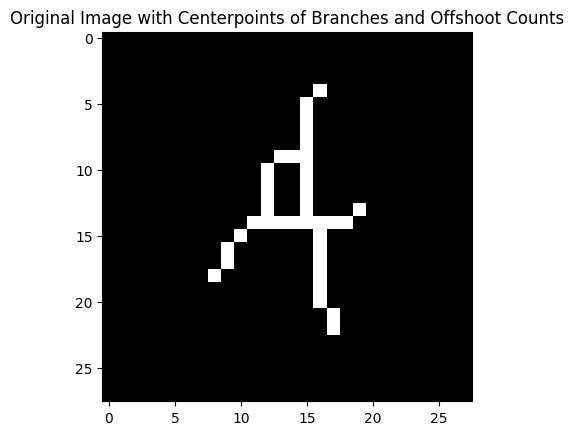

Centerpoints of Branches and Offshoot Counts: {}


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the black and white image
image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)

# Apply skeletonization to the image
skeleton = cv2.ximgproc.thinning(image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Find branch endpoints using morphological operations
branch_points = cv2.bitwise_and(skeleton, cv2.bitwise_not(cv2.dilate(skeleton, np.ones((3, 3)))))

# Create a color image with the original image
color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Initialize a dictionary to store centerpoints and their connected offshoots
centerpoints = {}

# Iterate through the branch endpoints
for y in range(1, branch_points.shape[0] - 1):
    for x in range(1, branch_points.shape[1] - 1):
        if branch_points[y, x] == 255:  # Check if the pixel is a branch endpoint
            surrounding_pixels = [
                branch_points[y - 1, x - 1], branch_points[y - 1, x], branch_points[y - 1, x + 1],
                branch_points[y, x - 1], branch_points[y, x + 1],
                branch_points[y + 1, x - 1], branch_points[y + 1, x], branch_points[y + 1, x + 1]
            ]

            # Count the number of offshoots connected to the endpoint
            num_offshoots = surrounding_pixels.count(255)

            # Add the centerpoint and its offshoot count to the dictionary
            centerpoints[(x, y)] = num_offshoots

# Overlay centerpoints on the color image
for (x, y), num_offshoots in centerpoints.items():
    color_image[y, x] = [0, 255, 255]  # Set the pixel to yellow
    cv2.putText(color_image, str(num_offshoots), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Display the color image with centerpoints and offshoot counts
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Centerpoints of Branches and Offshoot Counts')
plt.show()

# Print the centerpoints and their connected offshoot counts to the terminal
print("Centerpoints of Branches and Offshoot Counts:", centerpoints)
